# Importing libraries and loading the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('bank-full.csv',delimiter =';')
data_add = pd.read_csv('bank-additional-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Preprocessing

In [3]:
#Converting the labels of target variable from yes and no to 1 and 0 respectively 
scale_mapper = {'no':0, 
                'yes':1}
data['y'] = data['y'].replace(scale_mapper)

In [4]:
data.corr(method='pearson')

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [5]:
#Label encoding the months columns and addition of the year column

d = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
data['months'] = data['month'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
data['year'] = 2019
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,months,year
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,5,2019
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,5,2019
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,5,2019
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,5,2019
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,5,2019


In [6]:
# Combining the days,months and year columns to dates column for simplification of further analysis 
data['dates'] = pd.to_datetime((data.year*10000+data.months*100+data.day).apply(str),format='%Y%m%d')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,months,year,dates
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,5,2019,2019-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,5,2019,2019-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,5,2019,2019-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,5,2019,2019-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,5,2019,2019-05-05


# EDA

### Countplot of job categories based on their reponse to target variable

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

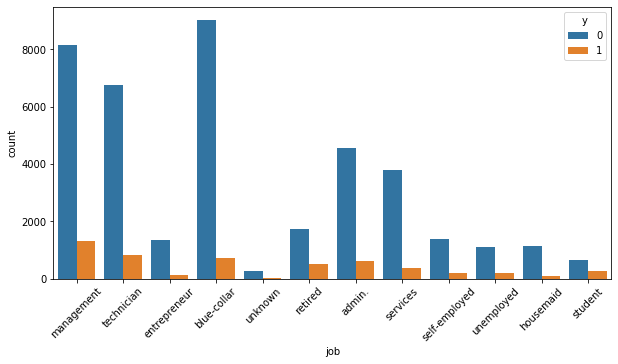

In [7]:
plt.figure(figsize=(10,5))
chart = sns.countplot(data=data,x='job',hue = 'y',)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### Individuals who have defaulted over payments across different job categories

In [8]:
import textwrap
def wrap_labels(ax, width, fontsize='medium'):
    labels = []
    for label in ax.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width=width, break_long_words=False)) 
    ax.set_xticklabels(labels, fontsize=fontsize, rotation=0)

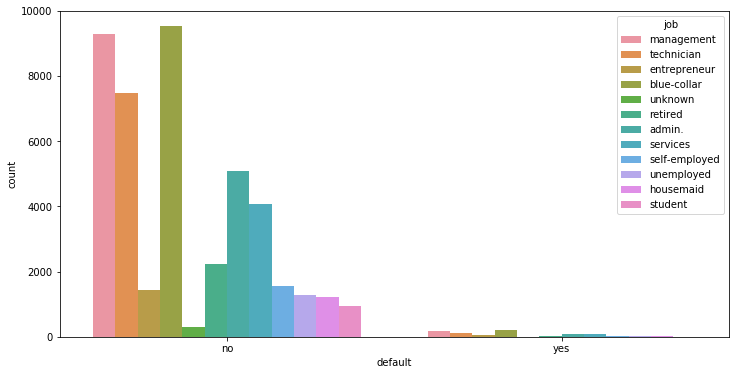

In [9]:
fig, ax = plt.subplots(figsize=(12, 6)) 
sns.countplot(x='default', data=data,hue ='job', ax=ax) 
wrap_labels(ax, width=10)

### Plot showing the duration of calls for each category of customers.

Text(0.5, 1, 'duration of calls for both customer types')

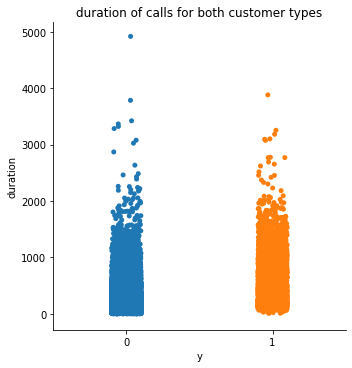

In [10]:
sns.catplot(x='y',y='duration',data=data)
plt.title('duration of calls for both customer types')

### Since the aim is to gain more customers, it would be better to focus our analysis on customers bank has had success with

In [11]:
# Dataframe containing customers who have subscribed for a term deposit 
data_yes = data['y'] == 1
data_1 = data[data_yes]
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,months,year,dates
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,5,2019,2019-05-05
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,5,2019,2019-05-05
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,5,2019,2019-05-05
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,5,2019,2019-05-05
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,5,2019,2019-05-05


### This plot provides the bank a more clear overview of who it should be targeting as part of its campaign strategy in terms of working professionals

Text(0.5, 1.0, 'Distribution of professonals who have taken term deposit')

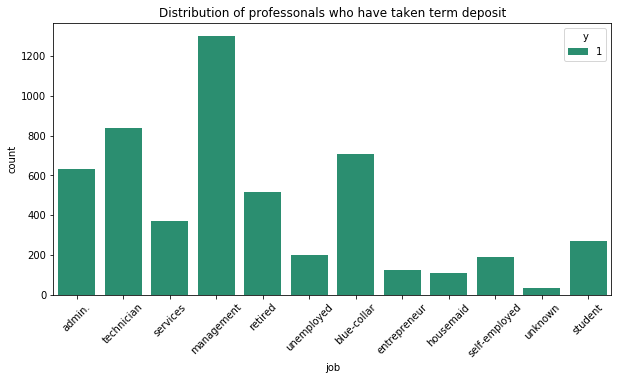

In [12]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data_1,
    x='job',
    hue = 'y',palette="Dark2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Distribution of professonals who have taken term deposit')

### Age distribution of customers

In [13]:
data_age = pd.DataFrame(data_1,columns=['age'])
d = {range(18, 24): '18-24 age group',range(24,40):'25-40 age group',range(40,65):'41-65 age group', range(65,96 ): '65+ age group'}

data_age['age_categories'] = data_age['age'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))

Text(0, 0.5, '')

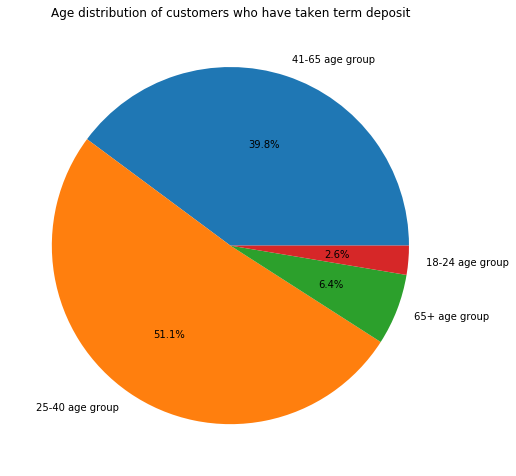

In [14]:
# Age distribution plot for customers with a term deposit
sal_ct = data_age['age_categories'].value_counts(sort=False) 
# sal_ct
ax = sal_ct.plot(kind='pie', figsize=(8, 10),autopct='%1.1f%%', title='Age distribution of customers who have taken term deposit')
ax.set_ylabel('')

In [15]:
# Categorization of dates into quarters
d = {'jan': 'quarter 1','feb':'quarter 1', 'mar': 'quarter 1', 'apr' : 'quarter 2','may' : 'quarter 2','jun' : 'quarter 2','jul' : 'quarter 3','aug' : 'quarter 3','sep' : 'quarter 3','oct' : 'quarter 4','nov' : 'quarter 4','dec' : 'quarter 4'}
data_1['Quarters'] = data_1['month'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
data_1.head(5)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,months,year,dates,Quarters
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,1,5,2019,2019-05-05,quarter 2
86,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,1,5,2019,2019-05-05,quarter 2
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,-1,0,unknown,1,5,2019,2019-05-05,quarter 2
129,55,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,-1,0,unknown,1,5,2019,2019-05-05,quarter 2
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2,-1,0,unknown,1,5,2019,2019-05-05,quarter 2


### Quarterly analysis

Text(0.5, 1.0, 'Customer gained for each quarter')

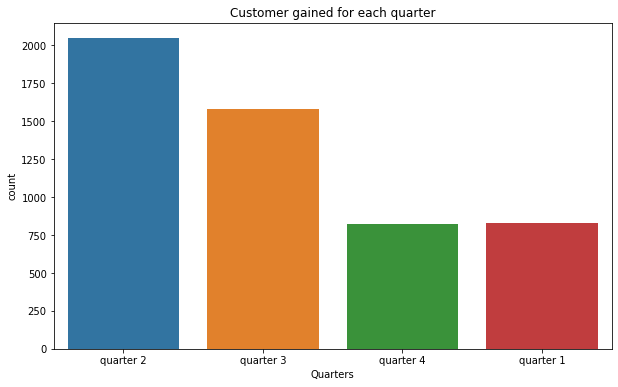

In [16]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.countplot(data=data_1, x = 'Quarters',ax=ax)
plt.title('Customer gained for each quarter')

### A more specific analysis to better understand the months that were found to report better figures in terms of customer gained

In [17]:
data_2 = data_1.groupby('dates', as_index=False).agg({"y": "sum"})
# data_2.head()

Text(0, 0.5, 'customer_numbers')

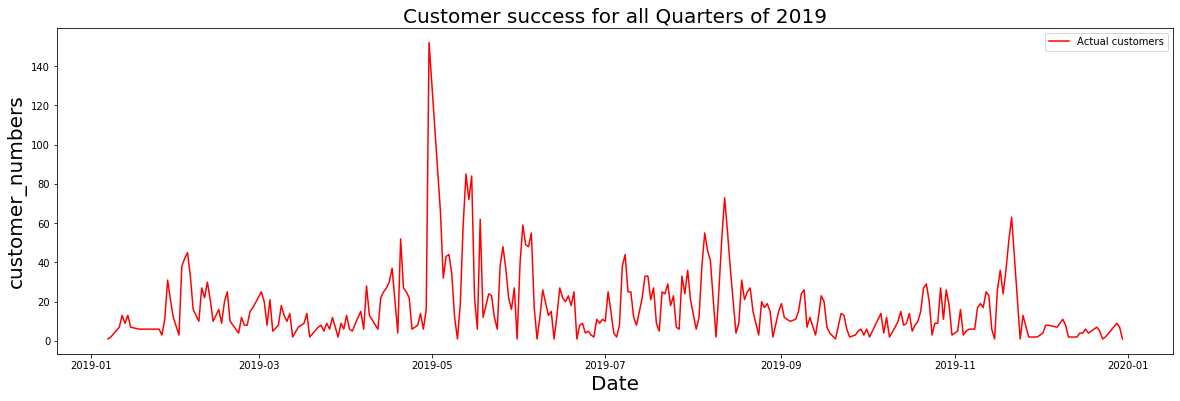

In [18]:
plt.figure(figsize=([20,6]))
plt.plot_date(data_2['dates'], data_2['y'], fmt='r-', xdate=True, ydate=False, label='Actual customers')
plt.legend(loc='upper right')
plt.title('Customer success for all Quarters of 2019',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('customer_numbers',fontsize=20)

### Mean balance vs Job category

In [19]:
import textwrap
def wrap_labels(ax, width, fontsize='medium'):
    labels = []
    for label in ax.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width=width, break_long_words=False)) 
    ax.set_xticklabels(labels, fontsize=fontsize, rotation=45)

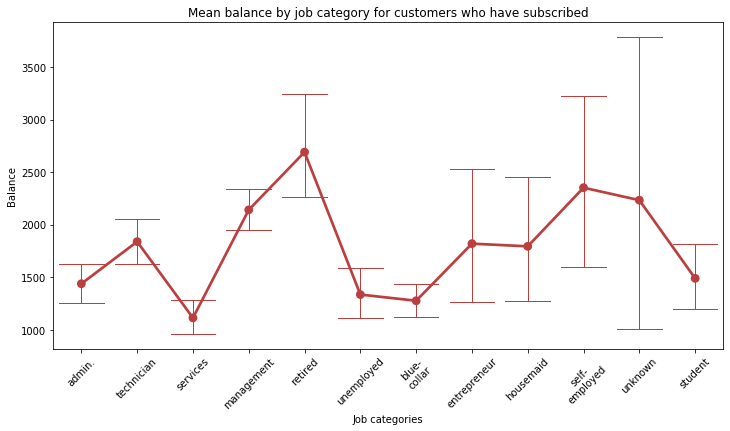

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x='job', y='balance', data=data_1, estimator=np.mean, scale=1, errwidth=1, capsize=.8, color="#bb3f3f") 
ax.set(title='Mean balance by job category for customers who have subscribed', xlabel='Job categories', ylabel='Balance') 
wrap_labels(ax, width=10, fontsize='medium')

In [21]:
# Random sampling the dataset for providing a just analysis for comparison
data_no = data['y'] == 0
data_2 = data[data_no]
data_2 = data_2.sample(frac=1).reset_index(drop=True)
data_3 = data_2[:5290]

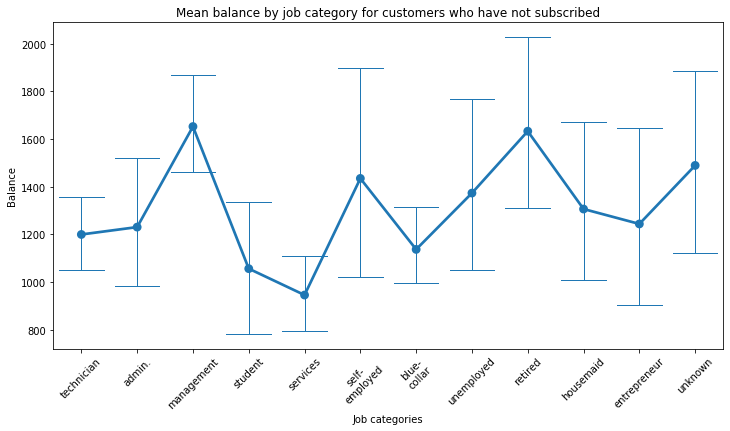

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.pointplot(x='job', y='balance', data=data_3, estimator=np.mean, scale=1, errwidth=1, capsize=.8) 
ax.set(title='Mean balance by job category for customers who have not subscribed', xlabel='Job categories', ylabel='Balance') 
wrap_labels(ax, width=10, fontsize='medium')

### Consumer Price Index vs Consumer Confidence Index

[Text(0, 0.5, 'Consumer confidence index'),
 Text(0.5, 0, 'Quarters'),
 Text(0.5, 1.0, 'Consumer confidence index for each quarter')]

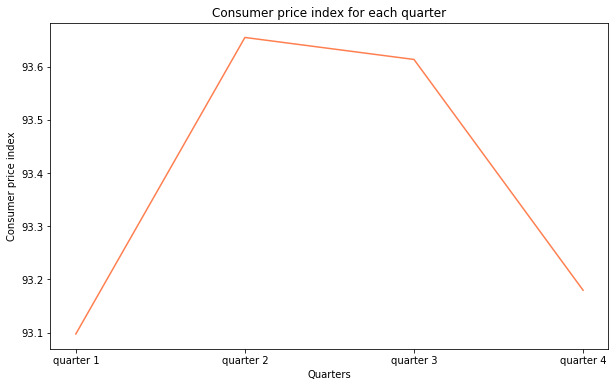

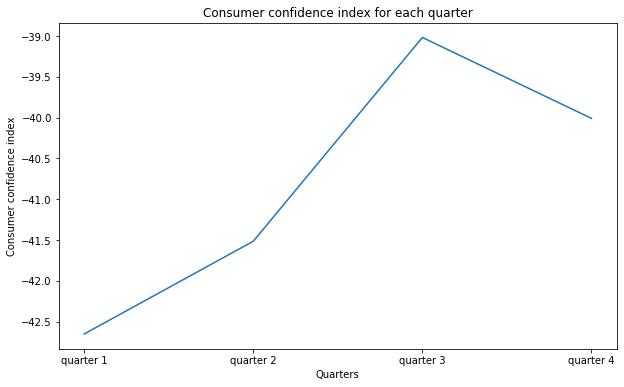

In [23]:
# Plotting Consumer price index as well as Consumer confidence index for all quarters 
d = {'jan': 'quarter 1','feb':'quarter 1', 'mar': 'quarter 1', 'apr' : 'quarter 2','may' : 'quarter 2','jun' : 'quarter 2','jul' : 'quarter 3','aug' : 'quarter 3','sep' : 'quarter 3','oct' : 'quarter 4','nov' : 'quarter 4','dec' : 'quarter 4'}
data_add['Quarters'] = data_add['month'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Quarters', y='cons.price.idx', data=data_add, ci=None,ax=ax,color="coral")
ax.set(xlabel='Quarters', ylabel='Consumer price index',title='Consumer price index for each quarter')

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Quarters', y='cons.conf.idx', data=data_add, ci=None,ax=ax)
ax.set(xlabel='Quarters', ylabel='Consumer confidence index',title='Consumer confidence index for each quarter')

## Conclusions from our EDA analysis:

#### 1.Professionals who have been hired by some kind of organization are found to be more inclined towards the scheme in comparison to those who are self-employed.

#### 2.Customers who have defaulted over loan payments are less likely to subscribe for a term deposit.

#### 3.Individuals who have stable income and those approaching retirement seem to be looking for investments which will pay dividends in future. Those who are past retirement age and those who are starting out in their careers have been found to show little to no interest in the scheme.

#### 4.Customers who have subscribed for a term deposit have had a much higher average bank balance when compared to customers who havent.

#### 5.Interestingly from the first graph we can see that people who enjoy a good bank balance are either self employed or retired or individuals whose professions are undisclosed.

#### 6.Despite these individuals having good bank balance they havent added much numbers in terms of customer growth.

#### 7.Quarters 2 and 3 have reported close to double the figures in comparison with rest of the quarters. The bank should certainly focus its strategies towards these quarters.

#### 8.Quarters 2 and 3 have reported higher consumer price index numbers, also the consumer confidence index which determines peoples willingness to spend,was at its lowest for the 2nd and 3rd quarter.Coincidentaly these turned out to be good quarters for the bank.Probably an indication about people's intention to save more.

# Machine learning models implementation

In [24]:
# Label encoding of variables which were categorical for purpose of EDA
le = preprocessing.LabelEncoder()
data['job'] = data[['job']].apply(le.fit_transform)
data ['education']= data[['education']].apply(le.fit_transform)
data['default'] = data[['default']].apply(le.fit_transform)
data['housing'] = data[['housing']].apply(le.fit_transform)
data['loan'] = data[['loan']].apply(le.fit_transform)
data['marital'] = data[['marital']].apply(le.fit_transform)
data['poutcome'] = data[['poutcome']].apply(le.fit_transform)

# Feature extraction

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = data.drop(columns=['age','contact','month','day','year','dates','y'])
y = data.y

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Num Features: 3
Selected Features: [False False False  True False  True  True False False False False False
 False]
Feature Ranking: [ 7  4  3  1 11  1  1  9  5 10  6  2  8]


# Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import classification_report

In [27]:
X = data[['balance','poutcome','duration','job','default']]
y = data['y']
Xs = scale(X)
Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y,test_size=0.3)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [28]:
lr = LogisticRegression()
model = lr.fit(Xs_train,y_train)
# model = lr.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
y_pred = model.predict(Xs_test)
# y_pred = model.predict(X_test)
print("Accuracy for test data:",metrics.accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Accuracy for test data: 0.8873488646416986


## Model evaluation

In [30]:
print(metrics.roc_auc_score(y_test, y_pred))

0.5700886667365748


In [31]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[11788   168]
 [ 1360   248]]


### Precision

In [32]:
precision = TP / float(TP + FP)
precision

0.5961538461538461

# KNN 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
knn = KNeighborsClassifier(n_neighbors=10,weights='distance')

In [34]:
X = data[['balance','poutcome','duration','job','default']]
y = data['y']
Xs = scale(X)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y,test_size=0.3)
# Xs.shape

In [35]:
model = knn.fit(Xs_train,y_train)
y_pred = model.predict(Xs_test)
# model = knn.fit(X_train,y_train)
# y_pred = model.predict(X_test)

In [36]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
# knn.score(y_test,y_pred)

Accuracy: 0.892288410498378


# Model evaluation

In [37]:
print(metrics.roc_auc_score(y_test, y_pred))

0.6480251965627445


In [38]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[11591   430]
 [ 1031   512]]


In [39]:
precision = TP / float(TP + FP)
precision

0.5435244161358811

# Random forest classifier

In [40]:
data_3 = pd.DataFrame(data_2)
# data_3.describe()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [42]:
X = data[['balance','poutcome','duration','job','default']]
y = data['y']
Xs = scale(X)
Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y,test_size=0.3,random_state=1)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [43]:
dtr = RandomForestClassifier(max_depth=10,criterion='entropy')
model = dtr.fit(Xs_train,y_train)
# model = dtr.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
y_pred = model.predict(Xs_test)
# y_pred = model.predict(X_test)

In [45]:
print("Accuracy for test data:",metrics.accuracy_score(y_test,y_pred))
# print("Accuracy for train data:",metrics.accuracy_score(model))

Accuracy for test data: 0.8992185196107343


# Model evaluation

In [46]:
print(metrics.roc_auc_score(y_test, y_pred))

0.6432611447205566


In [47]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [48]:
precision = TP / float(TP + FP)
precision

0.6176470588235294

# AdaBoostClassifier

In [49]:
import sklearn
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators = 100)
X = data[['balance','poutcome','duration','job','default']]
y = data['y']
Xs = scale(X)
Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y,test_size=0.3)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [50]:
model = ABC.fit(Xs_train,y_train)
y_pred = model.predict(Xs_test)
# model = ABC.fit(X_train,y_train)
# y_pred = model.predict(X_test)
print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(y_pred, y_test)))

Test Accuracy: 0.8991 


# Model evaluation

In [51]:
print(metrics.roc_auc_score(y_test, y_pred))

0.6434261846332282


In [52]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [53]:
precision = TP / float(TP + FP)
precision

0.6595744680851063

# BaggingClassifier 

In [54]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(n_estimators = 100)
X = data[['balance','poutcome','duration','job','default']]
y = data['y']
Xs = scale(X)
Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y,test_size=0.3)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [55]:
model = BC.fit(Xs_train,y_train)
y_pred = model.predict(Xs_test)
# model = BC.fit(X_train,y_train)
# y_pred = model.predict(X_test)
print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(y_pred, y_test)))

Test Accuracy: 0.8837 


# Model evaluation

In [56]:
print(metrics.roc_auc_score(y_test, y_pred))

0.6391638975492121


In [57]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [58]:
precision = TP / float(TP + FP)
precision

0.525940996948118

# GradientBoostingClassifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier 
GBC = GradientBoostingClassifier(n_estimators = 100)
X = data[['balance','poutcome','duration','job','default']]
y = data['y']
Xs = scale(X)
Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y,test_size=0.3)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [60]:
# model = GBC.fit(X_train,y_train)
# y_pred = model.predict(X_test)
model = GBC.fit(Xs_train,y_train)
y_pred = model.predict(Xs_test)
print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(y_pred, y_test)))

Test Accuracy: 0.8997 


# Model evaluation

In [61]:
print(metrics.roc_auc_score(y_test, y_pred))

0.6615502909847566


In [62]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [63]:
precision = TP / float(TP + FP)
precision

0.6581691772885284

# Preferred model for implementation 

#### 1. Since our aim is to identify customers who can potentially subscribe for a term deposit, we need to keep in mind certain evaluation metrics while selecting the model for implementation.

#### 2. Since we have a mix of continous and label encoded variables it would be a good option to scale our continuous feature values. 

#### 3. Another important factor that we need to keep in mind is that we have a highly imbalanced classification. So the AUC score will play a key role in deciding the model of implementation. 

#### 4. Most of our models have helped achieve a very good accuracy score for our testing data.But the models which have resulted in better AUC scores are GradientBoostingClassifier with 65% AUC score followed by ADA and RandomForestClassifier both achieving 64% score. 

#### 5. Implementing either of these three classifier models can potentially help the bank predict the customers who can subscribe for the term deposit.

#### 6. But if we are to choose one GradientBoostingClassifier has slight advantage as it also scores highest in terms of precision score.

### Implementation of super learner model (ADA and GradientBoostingClassifier)

In [72]:
import mlens
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
GBC = GradientBoostingClassifier(n_estimators = 100)
ADA = AdaBoostClassifier(n_estimators=100)

In [73]:
ensemble = SuperLearner(scorer=metrics.accuracy_score,random_state=555,verbose=2)
ensemble.add([GBC,ADA])
ensemble.add_meta(LogisticRegression())
ensemble.fit(Xs_train,y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:01


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...31a6050>)],
   n_jobs=-1, name='group-7', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x1331a6050>, shuffle=False,
       verbose=2)

In [74]:
print('accuracy for train:',accuracy_score(ensemble.predict(Xs_train),y_train))
print('accuracy for test:',accuracy_score(ensemble.predict(Xs_test),y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
accuracy for train: 0.9010016747243025

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
accuracy for test: 0.8973016809200826


### Selecting combination of our two best performing models has not changed the testing accuracy of our data much. So individual performances are the best way to move forward with. 